## Use Audacity to load in .stream~ and export 6 channels of audio
## Process mono files and concatenate into 6-channel wav files
(skip if already done)

In [1]:
import soundfile as sf
import numpy as np

data1,fs=sf.read('./audio_6channels17-01.WAV')
data2,fs=sf.read('./audio_6channels17-02.WAV')
data3,fs=sf.read('./audio_6channels17-03.WAV')
data4,fs=sf.read('./audio_6channels17-04.WAV')
data5,fs=sf.read('./audio_6channels17-05.WAV')
data6,fs=sf.read('./audio_6channels17-06.WAV')



In [19]:
#data = np.zeros((data1.shape[0],6))
data = np.stack((data1,data2,data3,data4,data5,data6),axis=1)
print(data.shape)

(58907136, 6)


In [20]:
filename = 'audio17_6.wav'
sf.write(filename, data, fs)

## Overview of the audio file in question 


In [21]:
from scipy.io import wavfile
import csv

#fs, data = wavfile.read('audio17_6.wav')

readings = np.zeros([5])
max_samples = 10
ti=int(fs/5)#designate 0.2s as one block?
time=0

print('Audio file loaded')
print('Audio length:',data.shape[0]/fs,'seconds')
print('Number of blocks: ',data.shape[0] // ti)

Audio file loaded
Audio length: 3681.696 seconds
Number of blocks:  18408


## Basic setup of microphone array and pyroomacoustic

In [25]:
import pyroomacoustics as pra
from pyroomacoustics.doa import circ_dist

######
# We define a meaningful distance measure on the circle

# Location of original source
azimuth = 61. / 180. * np.pi  # 60 degrees
distance = 3.  # 3 meters

#######################
# algorithms parameters
SNR = 0.    # signal-to-noise ratio
c = 343.    # speed of sound
fs = 44100  # sampling frequency
nfft = 256  # FFT size
freq_bins = np.arange(5, 60)  # FFT bins to use for estimation

# We use a circular array with radius 15 cm # and 12 microphones
R = pra.circular_2D_array((5,5), 6, 0., 0.0463)
source = np.array([2, 5])

In [34]:
import matplotlib.pyplot as plt
from IPython.display import clear_output, Image, display, HTML
import IPython

## Animate DOA at each frame, and record in txt file
total #rows written in the csv file should be #blocks = 18408, each block is 0.2 sec

In [51]:
doatxt=""
for blocks in range(0,data.shape[0] // ti):
#for blocks in range(0,10):
    signals=[]
    for i in range(0,data.shape[1]):
        signals.append(data[blocks*ti:(blocks+1)*ti,i])
    #print(len(signals[0]))
    X = np.array([ 
        pra.stft(signal, nfft, nfft // 2, transform=np.fft.rfft).T 
        for signal in signals ])
    #X shape should be (6,129,24)
    
    algo_name="SRP"   
    # Construct the new DOA object
    # the max_four parameter is necessary for FRIDA only
    doa = pra.doa.algorithms[algo_name](R, fs, nfft, c=c, max_four=4)
    
    # this call here perform localization on the frames in X
    doa.locate_sources(X, freq_bins=freq_bins)
    
    #for plotting the animation
    #doa.polar_plt_dirac()
    #plt.title(algo_name)
    #clear_output(wait=True)
    #plt.show()
    
    doatxt += str(blocks*0.2)+" "+str(doa.azimuth_recon[0] / np.pi * 180.)+"\n"
    if blocks%100==0:
        #this is the percentage of being done
        print(blocks/(data.shape[0] // ti)*100,"%")


f= open("./doa17.txt","w+")
f.write(doatxt)
f.close()


0.0 %
0.5432420686657975 %
1.086484137331595 %
1.6297262059973925 %
2.17296827466319 %
2.7162103433289873 %
3.259452411994785 %
3.8026944806605822 %
4.34593654932638 %
4.889178617992177 %
5.4324206866579745 %
5.975662755323772 %
6.51890482398957 %
7.062146892655368 %
7.6053889613211645 %
8.148631029986962 %
8.69187309865276 %
9.235115167318558 %
9.778357235984354 %
10.321599304650151 %
10.864841373315949 %
11.408083441981747 %
11.951325510647544 %
12.494567579313342 %
13.03780964797914 %
13.581051716644938 %
14.124293785310735 %
14.667535853976531 %
15.210777922642329 %
15.754019991308127 %
16.297262059973924 %
16.840504128639722 %
17.38374619730552 %
17.926988265971318 %
18.470230334637115 %
19.013472403302913 %
19.556714471968707 %
20.099956540634505 %
20.643198609300303 %
21.1864406779661 %
21.729682746631898 %
22.272924815297696 %
22.816166883963493 %
23.35940895262929 %
23.90265102129509 %
24.445893089960887 %
24.989135158626684 %
25.53237722729248 %
26.07561929595828 %
26.6188613

## with txt file, doa info at each block, this should be synchronized with rest of the recorder data

## Use Yoav as transcription ground truth, extract his time stamps and plot the corresponding DOA from group1 respeaker data, as a function of time

In [1]:
filename = "/Users/lilyh/Desktop/transcriptions/complete-transcripts/yoav-complete.txt"
timestamps = []
lines = open(filename,'r').readlines()
for line in lines:
    newline = line
    if len(newline.split())!=0:
        time = line.split()[0]
        timestamps.append(float(time))
        
        

In [2]:
print(timestamps)

[1.0, 23.3, 24.8, 38.0, 43.4, 56.1, 71.8, 76.7, 81.0, 89.1, 105.8, 129.7, 135.5, 148.9, 149.5, 165.8, 167.9, 168.9, 196.6, 197.7, 205.5, 221.0, 228.4, 231.6, 234.4, 236.2, 260.5, 266.8, 269.6, 290.7, 293.5, 298.8, 301.6, 309.7, 317.1, 332.6, 341.0, 351.1, 375.6, 382.2, 394.3, 418.9, 427.3, 431.8, 438.3, 454.5, 457.6, 467.0, 468.8, 470.7, 477.2, 500.5, 521.7, 527.9, 531.1, 533.7, 682.3, 688.6, 792.3, 813.9, 818.5, 819.9, 831.6, 839.6, 852.1, 883.2, 900.7, 907.3, 907.8, 917.9, 925.0, 942.1, 949.0, 954.5, 963.9, 970.1, 970.8, 978.7, 983.6, 984.6, 1013.2, 1017.8, 1027.5, 1038.6, 1050.5, 1060.0, 1069.4, 1076.3, 1087.0, 1095.5, 1121.7, 1122.2, 1185.5, 1201.5, 1204.6, 1211.6, 1214.4, 1219.8, 1253.0, 1258.7, 1302.4, 1312.1, 1319.5, 1323.5, 1346.6, 1353.4, 1361.0, 1364.5, 1372.5, 1373.6, 1376.8, 1393.4, 1397.3, 1409.1, 1414.9, 1427.7, 1434.8, 1444.9, 1450.3, 1453.2, 1460.1, 1464.6, 1496.6, 1510.3, 1511.7, 1532.7, 1533.2, 1547.2, 1549.9, 1564.3, 1577.5, 1588.0, 1598.4, 1606.4, 1617.5, 1618.1, 16

In [13]:
group1 = "/Users/lilyh/Desktop/transcriptions/complete-transcripts/doa/group1-doa-complete.txt"
yoav_doa = []
doas = open(group1,'r').readlines()
timestamp_doa = []
angles = []
for line in doas:
    newline = line
    if len(newline.split())!=0:
        time = line.split()[0]
        timestamp_doa.append(float(time))
        angles.append(float(line.split()[1]))

start = timestamp_doa[0]
end = timestamp_doa[-1]


In [100]:
i = 0
yoav_angles=[]
yoav_time = []
doalen = len(timestamp_doa)
while i < len(timestamps):
    if timestamps[i] < start:
        pass
    if timestamps[i] > end:
        break
    else:
        if int(round(timestamps[i]-start)/0.2)-1 < doalen and timestamp_doa[int(round(timestamps[i]-start)/0.2)-1]-timestamps[i] < 1:
            yoav_angles.append(angles[int((timestamps[i]-start)/0.2)-1])
            yoav_time.append(timestamps[i])
        elif int(round(end - timestamps[i])/0.2) <= doalen and timestamp_doa[-int(round(end - timestamps[i])/0.2)]-timestamps[i] < 1:
            yoav_angles.append(angles[int(-(end - timestamps[i])/0.2)])
            yoav_time.append(timestamps[i])
    i += 1
            

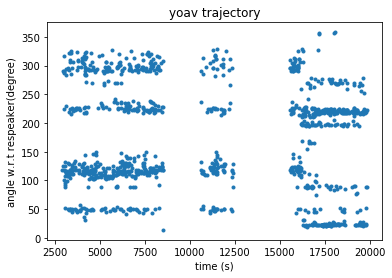

In [111]:
import matplotlib.pyplot as plt
plt.plot(yoav_time, yoav_angles,'.')
plt.title('yoav trajectory')
plt.xlabel('time (s)')
plt.ylabel('angle w.r.t respeaker(degree)')
plt.show()

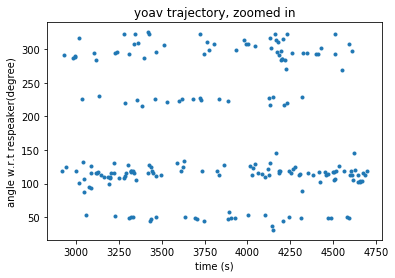

In [112]:
plt.plot(yoav_time[:200], yoav_angles[:200],'.')
plt.title('yoav trajectory, zoomed in')
plt.xlabel('time (s)')
plt.ylabel('angle w.r.t respeaker(degree)')
plt.show()

seems like there are two pairs of angles (each pair include 2 angles that are 180 degrees apart/symmetric across x axis(+-angle gets the same cosine), maybe a caveat in DOA analysis??) when the inverse consine has two solutions.

## sanity check -- plot entire group 1's angle

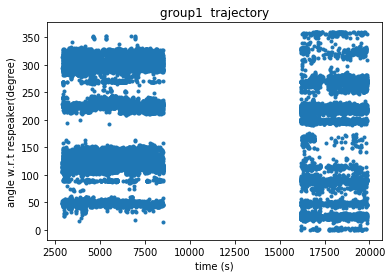

In [113]:
plt.plot(timestamp_doa, angles,'.')
plt.title('group1  trajectory')
plt.xlabel('time (s)')
plt.ylabel('angle w.r.t respeaker(degree)')
plt.show()

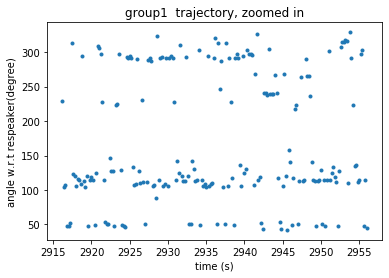

In [114]:
plt.plot(timestamp_doa[:200], angles[:200],'.')
plt.title('group1  trajectory, zoomed in')
plt.xlabel('time (s)')
plt.ylabel('angle w.r.t respeaker(degree)')
plt.show()